In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random
def euclidean(point, data):
  #print(np.shape(point))[0]
  return np.sqrt(np.sum((np.array(point) - np.array(data))**2))


    

In [2]:
# Create a dataset of 2D distributions
centers = 7
X_train, true_labels = make_blobs(n_samples=10000, centers=centers, random_state=42)
#print(X_train[0])
#X_train=[[random.randint(-10000,10000),random.randint(-10000,10000)] for i in range(10000)]
X_train = StandardScaler().fit_transform(X_train)


In [3]:
def display(X_t,cent,title=""):
  #plt.figure(figsize=[15,7.5])
  sns.scatterplot(x=[X[0] for X in X_t],
                y=[X[1] for X in X_t], hue=true_labels,
#                hue=true_labels,
        #        style=classification,
                palette="deep",
                legend=None
                )
  plt.plot([x for x, _ in cent],
         [y for _, y in cent],
         'k+',
         markersize=15,
         )
  plt.xticks([])
  plt.yticks([])
  
  plt.title(title,pad=15)
  plt.show()

In [4]:
22940247968.474083-106558750382.46014

-83618502413.98605

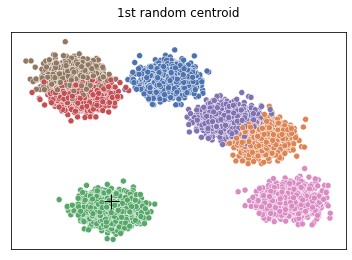

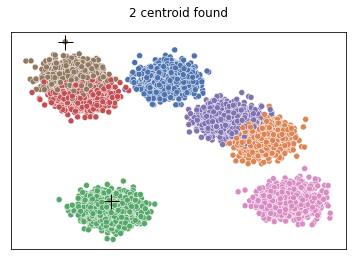

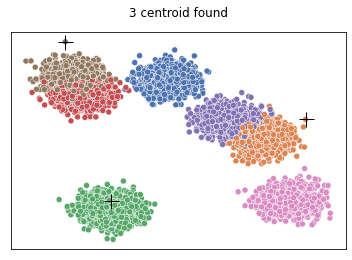

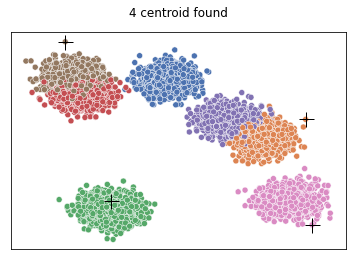

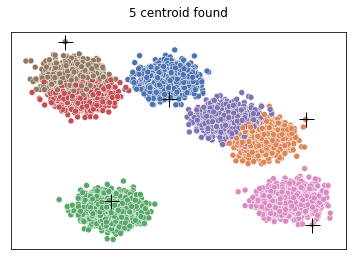

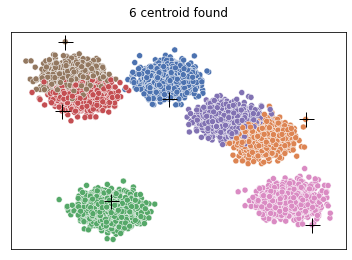

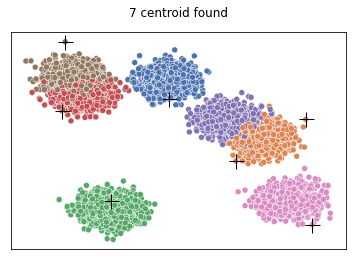

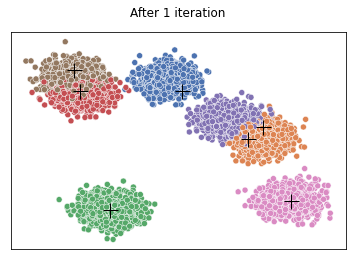

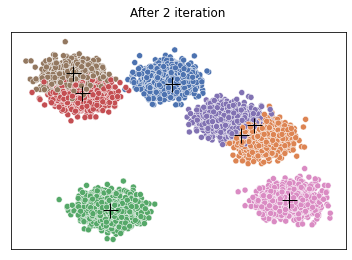

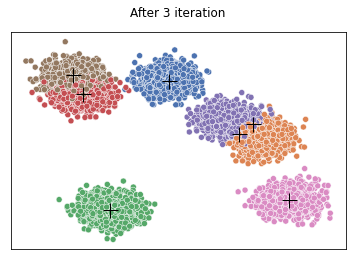

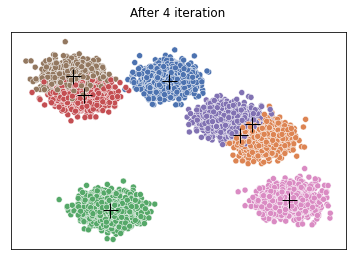

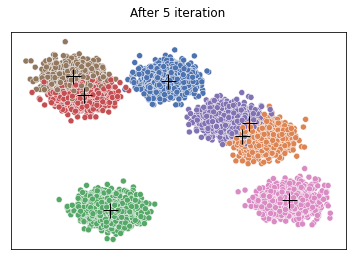

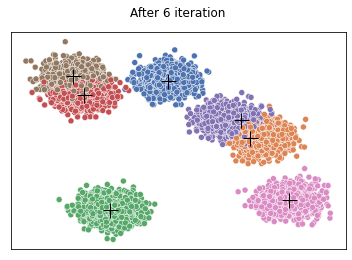

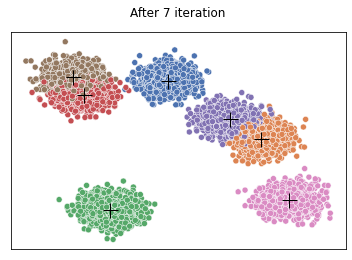

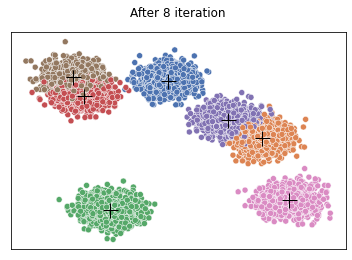

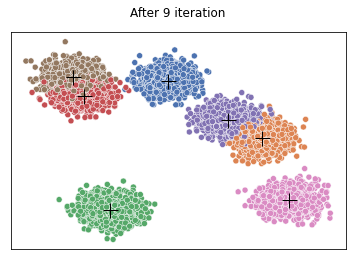

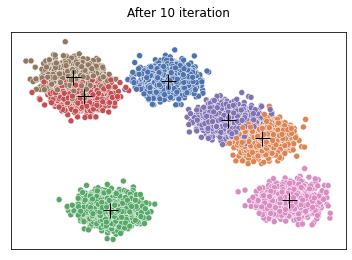

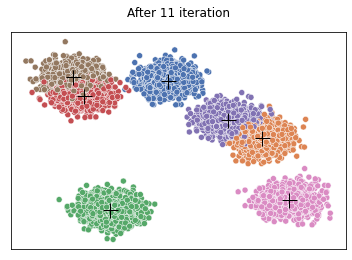

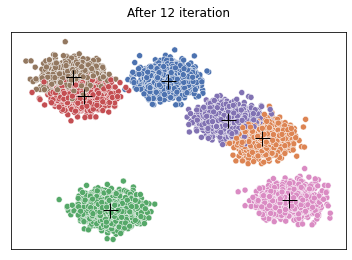

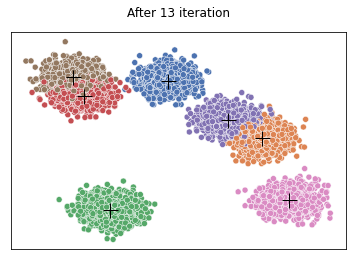

Number of iteration- 13


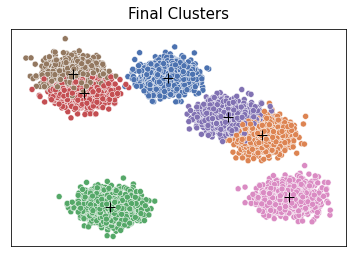

In [18]:

class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    def fit(self, X_train):
        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for first centroid

        self.centroids = [random.choice(X_train)]
    #    self.centroids = np.max(X_train,axis=1)
        
        display(X_train,self.centroids,"1st random centroid")
        for _ in range(self.n_clusters-1):
          distance=[]
          for x in X_train:
            min=0
            index=0
            d=[]
            for c in self.centroids:
             # print(c,"\n",x)
              d.append(euclidean(c,x))
            distance.append(np.min(d))
      #    print(len(distance))
          
  #        print(X_train[np.argmax(distance)])
          self.centroids.append(X_train[np.argmax(distance)])
          #print("this---",_)
          title=str(_+2)+" centroid found"
          display(X_train,self.centroids,title)


        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
              d=[]
              for c in self.centroids:
                d.append(euclidean(c,x))
         #     print(d)
              centroid_idx = np.argmin(d)
              sorted_points[centroid_idx].append(x)
              #print(sorted_points)

          #    break

            
           # break
            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]




            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
            title="After "+str(iteration)+" iteration"
#            print("iteration no-",iteration)
            display(X_train,self.centroids,title)
         #   print("centrod-",self.centroids)
          #  print("previous",prev_centroids)

        print("Number of iteration-",iteration)



    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs

# Fit centroids to dataset
random.seed(10)
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)
# View results
class_centers, classification = kmeans.evaluate(X_train)
#print(len(classification))
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         'k+',
         markersize=10,
         )
plt.xticks([])
plt.yticks([])
plt.title("Final Clusters",fontsize=15,pad=10)

plt.show()

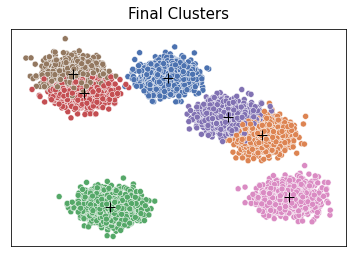

In [17]:
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                 hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         'k+',
         markersize=10,
         )
plt.xticks([])
plt.yticks([])
plt.title("Final Clusters",fontsize=15,pad=10)

plt.show()

In [7]:
d=np.array([4])
cx=np.array([3,2])

In [8]:
d=[]

In [9]:
d.append(3)

In [10]:
d.append(4)

In [11]:
np.min(d)

3

In [12]:
from sklearn.cluster import KMeans

In [13]:
knn=KMeans(11)

In [14]:
knn.fit(X_train)

KMeans(n_clusters=11)

In [15]:
knn.cluster_centers_

array([[ 1.54039216, -1.35281399],
       [-0.06587566,  0.99636321],
       [-0.89348596, -1.47025651],
       [ 1.11754195, -0.1850771 ],
       [-1.19461059,  0.87389868],
       [ 0.59995757,  0.25604173],
       [-0.6464535 , -1.58769004],
       [-1.22316865,  1.15476336],
       [ 0.9038616 ,  0.07579132],
       [-1.03049009,  0.65337108],
       [ 1.27349478, -1.3323976 ]])

NameError: ignored

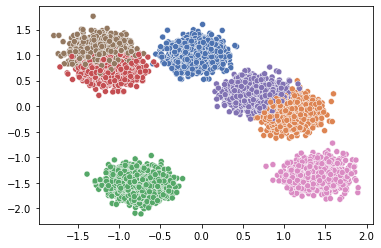

In [16]:
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot(a,b,
         'k+',
         markersize=10,
         )
plt.show()

In [ ]:
a=[]
b=[]
for i in range(11):
  a.append(knn.cluster_centers_[i][0])
  b.append(knn.cluster_centers_[i][1])

In [ ]:
a

In [ ]:
X_train

In [ ]:
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )

In [ ]:
centroids=[]
centroids.append( random.choice(X_train))

In [ ]:
centroids

In [ ]:
xx=centroids

In [ ]:
np.not_equal([1,2], [1,2]).any()

In [ ]:


centroids=[]
for i in range(5):
  centroids.append( random.choice(X_train))
#print(np.shape(centroids))
min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
centroids = [uniform(min_, max_) for _ in range(5)]
centroids=[[.1,.2],[-0.1,-0.2],[0.4,0.5],[-0.5,-0.2],[0,0]]
centroids=np.array(centroids)
print(np.shape(centroids))


for j in range(10000):
 # break
  list_centroid=[[],[],[],[],[]]

  for i in range(len(X_train)):
    distance=euclidean(X_train[i],centroids)
    closest_centroid_index = np.argmin(distance)
    list_centroid[closest_centroid_index].append(X_train[i])
                                                                                # print(list_centroid)

  previous_centroid=list_centroid
  #print(len(previous_centroid[1]))
  current_sort=[]
  for i in range(len(previous_centroid)):
    current_sort=current_sort+[i]*len(previous_centroid[i])

 




#  print(current_sort)
 # break
  #a=[0]*(len(previous_centroid[0]))
  #print(a)
  #break
                                                                                #for i in range(len(previous_centroid[0])):
                                                                                # print(previous_centroid[0][i])

                                                                                #print("\n",np.mean(previous_centroid[0],axis=0))
  for i in range(5):
    list_centroid[i]=np.mean(previous_centroid[i],axis=0)

  centroids=list_centroid

  if(j%1000==0):
    print("naman")
    sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=current_sort,
                
                palette="deep",
                legend=None
                )
    plt.plot([X[0] for X in centroids[0],X[1] for X in centroids[1]],
         'k+',
         markersize=10,
         )
    plt.show()
    



sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                
                palette="deep",
                legend=None
                )
plt.plot([X[0] for X in centroids],[X[1] for X in centroids],
         'k+',
         markersize=10,
         )
plt.show()

In [ ]:
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([X[0] for X in centroids],[X[1] for X in centroids],
         'k+',
         markersize=10,
         )
plt.show()

In [ ]:
centroids

In [ ]:
p=[X[0] for X in centroids]

In [ ]:
type(centroids)

In [ ]:
previous_centroid

In [ ]:
if(np.equal(centroids,previous_centroid).all==False):
  print("naman")

In [ ]:
kmeans1 = KMeans(2)
a=np.array(1,2)
b=np.array([2,2])
c=np.array([3,2])
d=np.array([101,2])
e=np.array([103,2])
X_train_2=np.array(a,b,c,d,e)

kmeans.fit(X_train_2)
# View results
class_centers, classification = kmeans.evaluate(X_train)
print(len(classification))
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
   #             hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         'k+',
         markersize=10,
         )
plt.show()

In [ ]:
type(X_train[0])

In [ ]:
X_train[0]